In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [4]:
persian_data = xr.open_mfdataset('/media/kenz/New Volume/Project/PDIR_Ghana*.nc')
persian_precip = persian_data.precip
# persian_precip = persian_precip.sel(datetime = slice('2001-01-01', '2020-12-31'))
persian_data

<xarray.Dataset>
Dimensions:   (lon: 113, lat: 163, datetime: 7306)
Coordinates:
  * lon       (lon) float32 -3.28 -3.24 -3.2 -3.16 -3.12 ... 1.08 1.12 1.16 1.2
  * lat       (lat) float32 11.24 11.2 11.16 11.12 11.08 ... 4.88 4.84 4.8 4.76
  * datetime  (datetime) datetime64[ns] 2001-03-01 2001-03-02 ... 2021-03-01
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime, lat, lon) int16 dask.array<chunksize=(306, 163, 113), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [7]:
def L_S_I(x, dim):
    R = x.resample(datetime='Y').mean()
    x_bar = x.resample(datetime = 'M').mean()
    LSI = (1/R)*sum(abs(x_bar-(R/12)))/10
    return LSI
index = L_S_I(persian_precip, 'datetime')

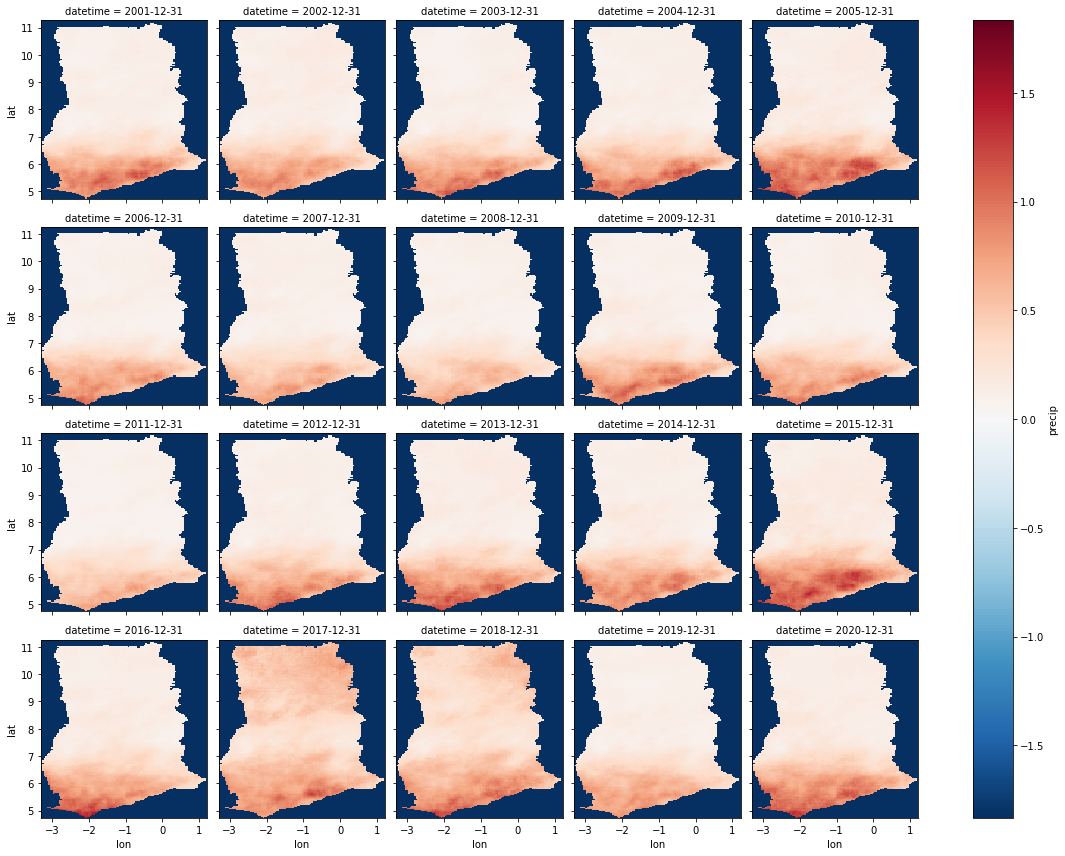

In [8]:
ax = index.plot(x='lon', y='lat', col='datetime', col_wrap=5)
# ax.fig.suptitle("Walsh and Lawler index", fontsize="large")